# Bayesian Classification Methods

## 1. Preparation

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy as sc
import seaborn as sn
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import balanced_accuracy_score
from tabulate import tabulate

In [ ]:
os.environ['KAGGLE_USERNAME'] = "username"
os.environ['KAGGLE_KEY'] = "key"

# dowload the datasets from Kaggle
!kaggle datasets download aguado/uci-adult-data-set-1994

# unzip the downloaded folder
!unzip archive.zip

In [2]:
# Reading dataset, identifying and dropping missing values

df = pd.read_csv("adult.data", header=None, names=['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation',
                                                   'relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                                                   'native_country','income'], na_values=" ?")

df_test = pd.read_csv("adult.test", header=None, names=['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation',
                                                   'relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                                                   'native_country','income'], na_values=" ?")

## 2. Description of the data

In [3]:
#Counting instances
a = len(df)
b = len(df_test)
print("The number of instances in the trainning set is:", a)
print("The number of instances in the test set is:", b)

# Identifying and dropping missing values
df = df.dropna()
df_test = df_test.dropna()
c = a - len(df)
d = b - len(df_test)
print('The number of missing values in the trainning set is:', c)
print('The number of missing values in the test set is:', d)

The number of instances in the trainning set is: 32561
The number of instances in the test set is: 16282
The number of missing values in the trainning set is: 2399
The number of missing values in the test set is: 1222


In [4]:
#Descriptive statistics for numerical features
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64


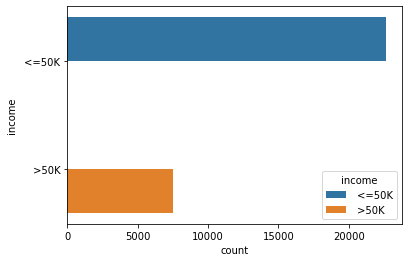

In [5]:
#Relative frequency of income feature categories
sn.countplot(y='income', hue='income', data = df)
print(df['income'].value_counts()/len(df))

<AxesSubplot:xlabel='count', ylabel='workclass'>

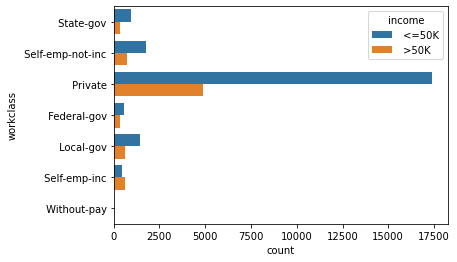

In [6]:
sn.countplot(y='workclass', hue='income', data = df)

<AxesSubplot:xlabel='count', ylabel='sex'>

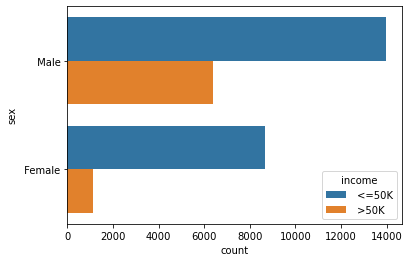

In [7]:
sn.countplot(y='sex', hue='income', data = df)

<AxesSubplot:xlabel='count', ylabel='race'>

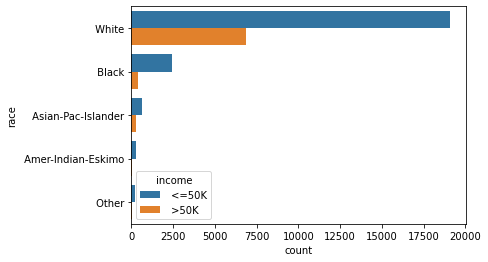

In [8]:
sn.countplot(y='race', hue='income', data = df)

<AxesSubplot:xlabel='count', ylabel='education'>

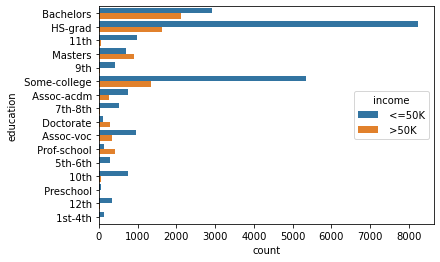

In [9]:
sn.countplot(y='education', hue='income', data = df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

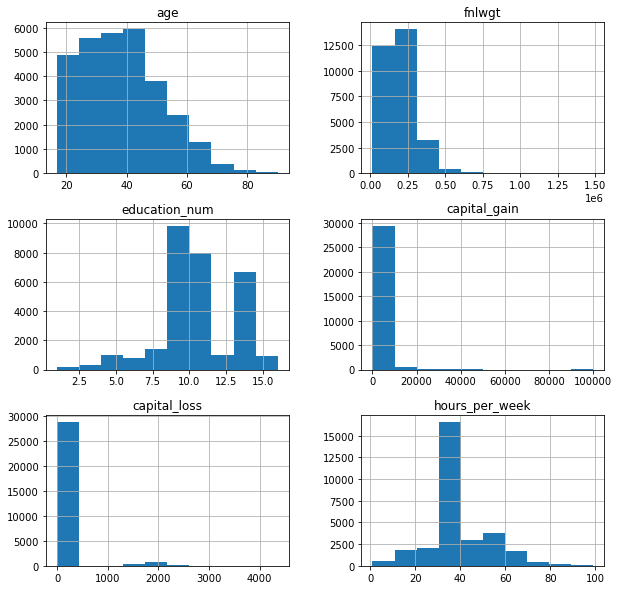

In [10]:
#Histogram of numeric features
df.hist(figsize=(10,10))

In [26]:
#Converting categorical features in numeric
le = preprocessing.LabelEncoder()
df.workclass = le.fit_transform(df.workclass)
df.education = le.fit_transform(df.education)
df.occupation = le.fit_transform(df.occupation)
df.native_country = le.fit_transform(df.native_country)
df.sex = le.fit_transform(df.sex)
df.race = le.fit_transform(df.race)
df.marital_status = le.fit_transform(df.marital_status)
df.income = le.fit_transform(df.income)
df_test.workclass = le.fit_transform(df_test.workclass)
df_test.education = le.fit_transform(df_test.education)
df_test.occupation = le.fit_transform(df_test.occupation)
df_test.native_country = le.fit_transform(df_test.native_country)
df_test.sex = le.fit_transform(df_test.sex)
df_test.race = le.fit_transform(df_test.race)
df_test.marital_status = le.fit_transform(df_test.marital_status)
df_test.income = le.fit_transform(df_test.income)

#scaling numeric features
X_numeric = df[['age','education_num','capital_gain','capital_loss','hours_per_week']]
X_numeric_test = df_test[['age','education_num','capital_gain','capital_loss','hours_per_week']]

normalizer = preprocessing.Normalizer().fit(X_numeric)
X_norm = normalizer.transform(X_numeric)

normalizer_test = preprocessing.Normalizer().fit(X_numeric_test)
X_norm_test = normalizer_test.transform(X_numeric_test)


df.age = X_norm[:,0]
df.education_num = X_norm[:,1]
df.capital_gain = X_norm[:,2]
df.capital_loss = X_norm[:,3]
df.hours_per_week = X_norm[:,4]

df_test.age = X_norm_test[:,0]
df_test.education_num = X_norm_test[:,1]
df_test.capital_gain = X_norm_test[:,2]
df_test.capital_loss = X_norm_test[:,3]
df_test.hours_per_week = X_norm_test[:,4]

#Creating X and y
n1 = len(df)
n2 = len(df_test)
df['x0'] = np.ones(n1)
df_test['x0'] = np.ones(n2)
X_train = df[['x0','age','workclass','education','education_num','occupation','sex','race','capital_gain','capital_loss','hours_per_week',
                        'native_country','marital_status']]
X_test = df_test[['x0','age','workclass','education','education_num','occupation','sex','race','capital_gain','capital_loss','hours_per_week',
                        'native_country','marital_status']]

y_train = df['income']
y_test = df_test['income']
n = len(df['income'].tolist())

## 3. Methodology

### 3.1 Logistic Regression

In [27]:
# Fitting the Logistic Regression model
model = LogisticRegression(fit_intercept=False, solver="newton-cg")
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
y_pred = model.predict(X_test)
beta_mle = np.array(model.coef_)[0,].T

0.7825365205843293
[[10825   535]
 [ 2740   960]]
10825 535 2740 960


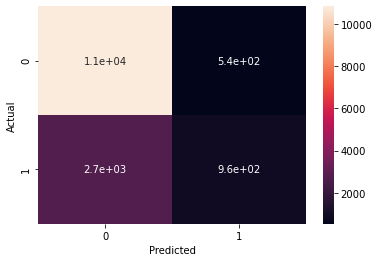

In [28]:
#Creating a confusion matrix and calculating accuracy for Logistic Regression
print(accuracy)
print(confusion_matrix(y_test, y_pred))

#Calculating Precision and Recall
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred).ravel()
print(tn_lr, fp_lr, fn_lr, tp_lr)

precision_lr = tp_lr/(tp_lr + fp_lr)
recall_lr = tp_lr/(tp_lr + fn_lr)

data = {'y_Actual':y_test,'y_Predicted':y_pred}

cm = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix_hm = pd.crosstab(cm['y_Actual'], cm['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_hm, annot=True)
plt.show()

### 3.2 Bayesian Logistic regression - Laplace approximation

In [29]:
#Creating sigmoid function
def sigma(x, beta):
    xbeta = x.dot(beta)
    d = 1. + np.exp(-xbeta)
    return d ** (-1)

#Negative log-likelihood
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x, beta))) + (1 - y).T.dot(np.log(1. - sigma(x, beta)))
    return -t

#Negative posterior
def neg_post(beta, x, y, m0, S0):
    logprior = - .5 * (beta - m0).T @ S0 @ (beta - m0)
    return nll(beta, x, y) - logprior

#Negative posterior first derivative
def neg_post_prime(beta, x, y, m0, S0):
    return x.T.dot(sigma(x, beta) - y) + S0.dot(beta - m0)

#Hessian
def laplace_prec(beta, x, S0):
    n = x.shape[0]
    S = np.diag(sigma(x, beta) * (1 - sigma(x, beta)))
    prec = S0.values + x.T.dot(S.dot(x))
    return prec

#Creating a function to compute Bayesian Logistic Regression using the Newton-Raphson method
def NewtonRaphsonBayesLogReg(beta0, x, y, m0, S0, maxiter, tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1  # anything bigger than tolerance would do here
    while (AbDiff > tolerance) & (i < maxiter):
        i = i + 1
        print('iteration ', i, ' Negative Log Posterior ', NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        h_inv = sc.linalg.inv(H)
        beta = beta - h_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new - NegLogPost)
        NegLogPost = NegLogPost_new
    if iter == maxiter:
        print('Did not Converge')
    return beta, h_inv

#Fitting Bayesian Logistic Regression
Xt = X_train
n, p = Xt.shape
m0 = np.zeros(p)
S0 = Xt.T.dot(Xt) / n
beta0 = np.zeros(p)
tolerance = 1e-04
maxiter = 100
beta_map, cov = NewtonRaphsonBayesLogReg(beta0, Xt, y_train,
                                         m0, S0, maxiter, tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  20906.7052600491  AbDiff  1
iteration  2  Negative Log Posterior  14681.81234682313  AbDiff  6224.892913225971
iteration  3  Negative Log Posterior  14284.038033078788  AbDiff  397.77431374434127
iteration  4  Negative Log Posterior  14261.374039408503  AbDiff  22.66399367028498
iteration  5  Negative Log Posterior  14261.252208396747  AbDiff  0.12183101175651245
[-1.08723904e+01  6.13449374e+00 -1.99989984e-02  5.27379799e-02
  2.91824059e+00  2.86313419e-02  1.27890965e+00  1.50832750e-01
  9.69768989e+00  9.04087561e+00  4.76858057e+00  1.38441215e-03
 -2.94920223e-01]


10800 560 2744 956


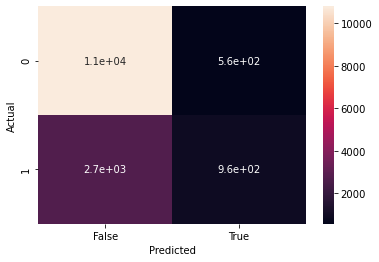

In [30]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples

# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test.dot(betas.T)
d = sigma(X_test,np.transpose(betas))
pred_probs_blr = np.mean(d, axis=1)
pred_class_blr = (pred_probs_blr > .5)

#Creating a confusion matrix and calculating accuracy for Bayesian Logistic Regression
data4 = {'y_Actual':y_test,'y_Predicted':pred_class_blr}

cm4 = pd.DataFrame(data4, columns=['y_Actual','y_Predicted'])
confusion_matrix_hm4 = pd.crosstab(cm4['y_Actual'], cm4['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#Calculating Precision and Recall
tn_blr, fp_blr, fn_blr, tp_blr = confusion_matrix(y_test, pred_class_blr).ravel()
print(tn_blr, fp_blr, fn_blr, tp_blr)

precision_blr = tp_blr/(tp_blr + fp_blr)
recall_blr = tp_blr/(tp_blr + fn_blr)

sn.heatmap(confusion_matrix_hm4, annot=True)
plt.show()

In [32]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['x0','age','workclass','education', 'education_num','occupation','sex','race','capital_gain','capital_loss','hours_per_week',
                        'native_country','marital_status']
results = pd.DataFrame(results,columns = col,index=ind)
results

,post mean,post se,lower 95% bound,upper 95% bound
x0,-10.872390,0.653955,-12.154141,-9.590639
age,6.134494,0.463244,5.226535,7.042453
workclass,-0.019999,0.015038,-0.049474,0.009476
education,0.052738,0.004291,0.044327,0.061149
education_num,2.918241,0.320705,2.289659,3.546822
occupation,0.028631,0.003655,0.021467,0.035796
sex,1.278910,0.038303,1.203835,1.353984
race,0.150833,0.019920,0.111789,0.189876
capital_gain,9.697690,0.626150,8.470437,10.924943
capital_loss,9.040876,0.613581,7.838256,10.243495


### 3.3 Linear Discriminant Analysis

In [33]:
#Fitting the Linear Disciminant Analysis Model
model2 = LinearDiscriminantAnalysis(solver='lsqr')
model2.fit(X_train, y_train)
accuracy2 = model2.score(X_test, y_test)
y_pred2 = model2.predict(X_test)
#beta_lda = np.array(model2.coef_)[0,].T
#intercept = np.array([model2.intercept_])[0,]
coef2 = np.array(model2.coef_)[0,].T
beta_lda = np.hstack((coef2))
model2_priors = model2.priors_
model2_covariance = model2.covariance_

0.7823373173970783
[[10731   629]
 [ 2649  1051]]
10731 629 2649 1051


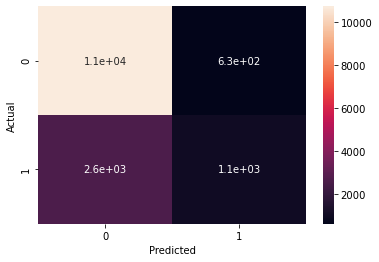

In [34]:
#Creating a confusion matrix and calculating accuracy for Linear Discriminant Analysis
print(accuracy2)
print(confusion_matrix(y_test, y_pred2))

#Calculating Precision and Recall
tn_lda, fp_lda, fn_lda, tp_lda = confusion_matrix(y_test, y_pred2).ravel()
print(tn_lda, fp_lda, fn_lda, tp_lda)

precision_lda = tp_lda/(tp_lda + fp_lda)
recall_lda = tp_lda/(tp_lda + fn_lda)

data2 = {'y_Actual':y_test,'y_Predicted':y_pred2}

cm2 = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
confusion_matrix_hm2 = pd.crosstab(cm2['y_Actual'], cm2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_hm2, annot=True)
plt.show()

### 3.4 Naive Bayes

In [35]:
#Fitting the Naives Bayes Model
model3 = GaussianNB()
model3.fit(X_train, y_train)
accuracy3 = model3.score(X_test, y_test)
y_pred3 = model3.predict(X_test)

0.7723771580345286
[[10481   879]
 [ 2549  1151]]
10481 879 2549 1151


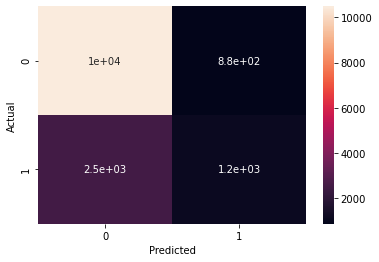

In [36]:
#Creating a confusion matrix and calculating accuracy for Naive Bayes
print(accuracy3)
print(confusion_matrix(y_test, y_pred3))

#Calculating Precision and Recall
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, y_pred3).ravel()
print(tn_nb, fp_nb, fn_nb, tp_nb)

precision_nb = tp_nb/(tp_nb + fp_nb)
recall_nb = tp_nb/(tp_nb + fn_nb)

data3 = {'y_Actual':y_test,'y_Predicted':y_pred3}

cm3 = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])
confusion_matrix_hm3 = pd.crosstab(cm3['y_Actual'], cm3['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_hm3, annot=True)
plt.show()

## 4. Prediction assessment

0.7825365205843293 7106.95862272303
0.7825365205843293 7106.958622723031
0.7700352350590026


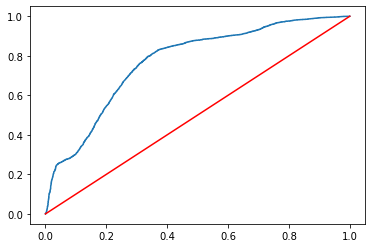

In [37]:
#prediction assessment for Logisti Regression
predict_probs = sigma(X_test,np.transpose(beta_mle))
predict_class = (predict_probs > .5)

AccRate_MLE = np.sum(predict_class==y_test)/len(y_test) 
LS_MLE = -(y_test.T.dot(np.log(predict_probs))+(1-y_test).T.dot(np.log(1-predict_probs)))

print(AccRate_MLE, LS_MLE)
print(metrics.accuracy_score(y_test,predict_class), metrics.log_loss(y_test, predict_probs, normalize=False))

fpr,tpr,thresholds = metrics.roc_curve(y_test,predict_probs)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC_MLE = metrics.roc_auc_score(y_test,predict_probs)
print(AUC_MLE)

0.7806108897742364 7081.67162309428 0.7726981109630758


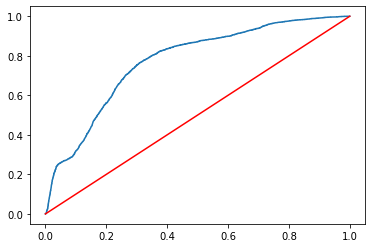

In [38]:
#Evaluate predictive performance of Bayesian Logistic Regression

AccRate = np.sum(pred_class_blr==y_test)/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = metrics.roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = metrics.roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

0.7708263703844691


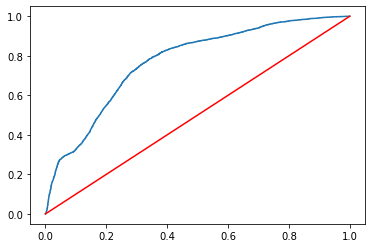

In [39]:
#prediction assessment for LDA approach
predict_probs_lda = sigma(X_test,np.transpose(beta_lda))
predict_class_lda = (predict_probs_lda > .5)

AccRate_LDA = np.sum(predict_class_lda==y_test)/len(y_test) 
LS_LDA = -(y_test.T.dot(np.log(predict_probs_lda))+(1-y_test).T.dot(np.log(1-predict_probs_lda)))

fpr_lda,tpr_lda,thresholds_lda = metrics.roc_curve(y_test,predict_probs_lda)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr_lda,tpr_lda)
plt.plot(xgrid,xgrid,'red')
AUC_LDA = metrics.roc_auc_score(y_test,predict_probs_lda)
print(AUC_LDA)

In [40]:
#Creating table to summarise metrics
bac1 = balanced_accuracy_score(y_test, y_pred)
bac2 = balanced_accuracy_score(y_test, pred_class_blr)
bac3 = balanced_accuracy_score(y_test, y_pred2)
bac4 = balanced_accuracy_score(y_test, y_pred3)
AUC_NB = metrics.roc_auc_score(y_test,y_pred3)
table = [['Model','Accuracy', 'Balanced Accuracy','AUC','Precision','Recall'], ['Logistic Regression',accuracy, bac1,AUC_MLE,precision_lr,recall_lr],['Bayesian Logistic Regression', AccRate, bac2,AUC,precision_blr,recall_blr],['Linear Discriminant Analysis',accuracy2,bac3,AUC_LDA,precision_lda,recall_lda],['Naive Bayes',accuracy3,bac4,AUC_NB,precision_nb,recall_nb]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════╤════════════╤═════════════════════╤══════════╤═════════════╤══════════╕
│ Model                        │   Accuracy │   Balanced Accuracy │      AUC │   Precision │   Recall │
╞══════════════════════════════╪════════════╪═════════════════════╪══════════╪═════════════╪══════════╡
│ Logistic Regression          │   0.782537 │            0.606182 │ 0.770035 │    0.64214  │ 0.259459 │
├──────────────────────────────┼────────────┼─────────────────────┼──────────┼─────────────┼──────────┤
│ Bayesian Logistic Regression │   0.780611 │            0.604541 │ 0.772698 │    0.630607 │ 0.258378 │
├──────────────────────────────┼────────────┼─────────────────────┼──────────┼─────────────┼──────────┤
│ Linear Discriminant Analysis │   0.782337 │            0.614342 │ 0.770826 │    0.625595 │ 0.284054 │
├──────────────────────────────┼────────────┼─────────────────────┼──────────┼─────────────┼──────────┤
│ Naive Bayes                  │   0.772377 │            0.61685